In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
from matplotlib import pyplot as plt

def row_num(x=None): return pd.set_option('display.max_rows',x)
def col_num(x=None): return pd.set_option('display.max_columns',x)

%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = (16,9)
plt.rcParams['axes.unicode_minus'] = False

# 1.DATA LOAD
---

In [2]:
df = pd.read_csv('../data/preprocessing/데이터정제_인구최종.csv', encoding='euc-kr')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   시군구코드            229 non-null    int64 
 1   시도명              229 non-null    object
 2   시군구명             229 non-null    object
 3   2019_노인청소년_예산    229 non-null    int64 
 4   2020_노인청소년_예산    229 non-null    int64 
 5   예산변화량            229 non-null    int64 
 6   2019_전체예산        229 non-null    int64 
 7   2020_전체예산        229 non-null    int64 
 8   2019_총인구         229 non-null    int64 
 9   2020_총인구         229 non-null    int64 
 10  2019_노인1인인구      229 non-null    int64 
 11  2020_노인1인인구      229 non-null    int64 
 12  2019_노인인구        229 non-null    int64 
 13  2020_노인인구        229 non-null    int64 
 14  총복지시설            229 non-null    int64 
 15  노인주거복지시설         229 non-null    int64 
 16  노인의료복지시설         229 non-null    int64 
 17  노인여가복지시설         229 non-null    in

# 2.부분 EDA 시각화
---

In [3]:
df_score = df.iloc[:,:3].copy()
df_score['지역명'] = df_score['시도명']+" "+df_score['시군구명']
df_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시군구코드   229 non-null    int64 
 1   시도명     229 non-null    object
 2   시군구명    229 non-null    object
 3   지역명     229 non-null    object
dtypes: int64(1), object(3)
memory usage: 7.3+ KB


In [4]:
# 현재까지 나온 스코어 결합
df_score['노인인구비'] = df['2020_노인인구'].values/df['2020_총인구'].values # 노인인구비율
df_score['노인1인할당예산'] = df['2020_노인인구'].values/df['2020_노인청소년_예산'] # 노인 1인당 할당 예산
df_score['노인복지예산비'] = df['2020_노인청소년_예산'].values/df['2020_전체예산'] # 노인 1인당 할당 예산
# df_score['']
df_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   시군구코드     229 non-null    int64  
 1   시도명       229 non-null    object 
 2   시군구명      229 non-null    object 
 3   지역명       229 non-null    object 
 4   노인인구비     229 non-null    float64
 5   노인1인할당예산  229 non-null    float64
 6   노인복지예산비   229 non-null    float64
dtypes: float64(3), int64(1), object(3)
memory usage: 12.6+ KB


In [5]:
print(df_score['노인복지예산비'].std())
print(df_score['노인복지예산비'].mean())

0.04012612185504699
0.11160928170966052


In [6]:
print(df_score['노인1인할당예산'].std())
print(df_score['노인1인할당예산'].mean())

0.35023220881182165
0.3327441391282864


C:\Users\yunjc\anaconda3\envs\main\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


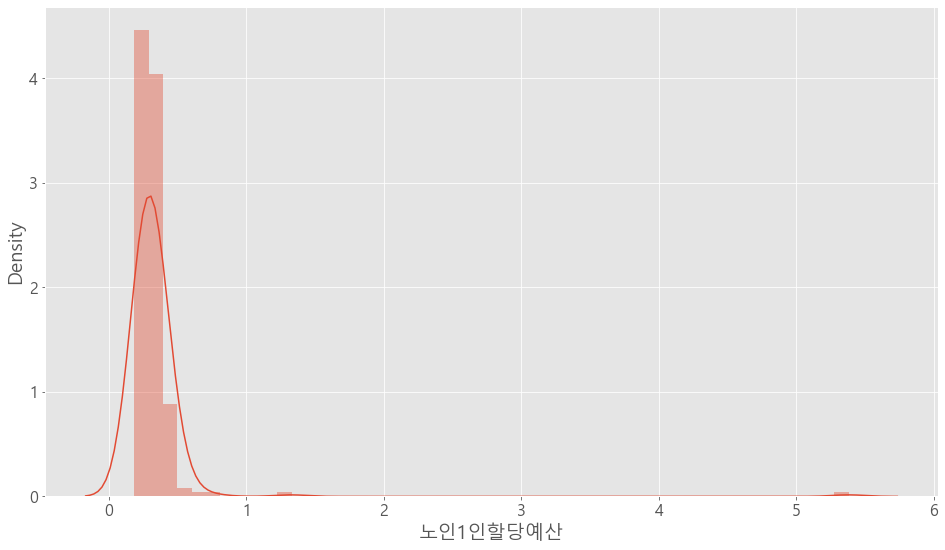

In [7]:
sns.distplot(df_score['노인1인할당예산'])
plt.show()

In [8]:
os.getcwd()

'c:\\Users\\yunjc\\python_jupyter\\Project_DA\\bigdatamap\\notebook'

C:\Users\yunjc\anaconda3\envs\main\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


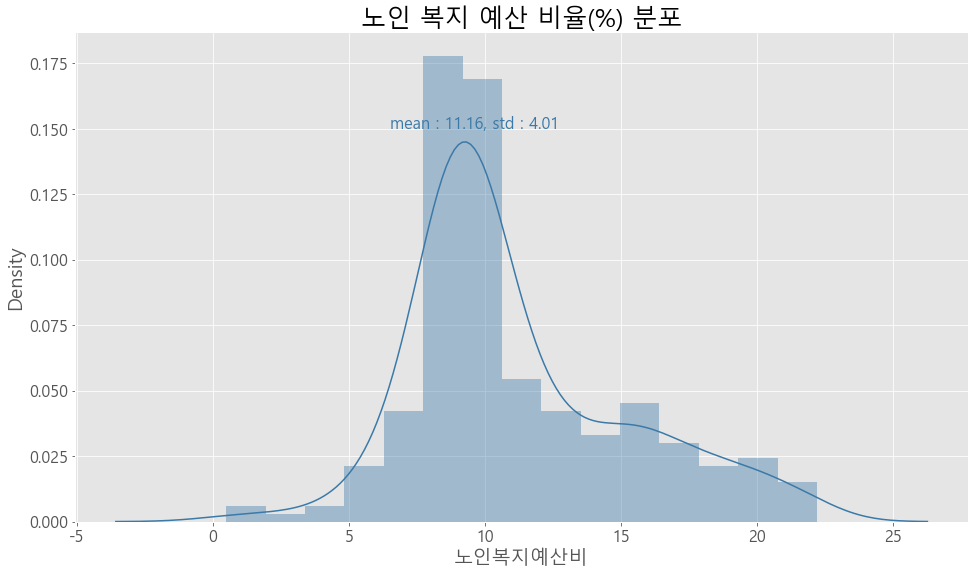

In [23]:
plt.title('노인 복지 예산 비율(%) 분포', size=25)
sns.distplot(df_score['노인복지예산비']*100,color='#3A79A8')
# plt.hlines(df_score['노인복지예산비'].mean(),color='black')
# plt.savefig('노인복지예산비분포.png')
plt.text(x=6.5, y=0.15, color='#3A79A8', 
         s=f"mean : {round(df_score['노인복지예산비'].mean()*100,2)}, std : {round(df_score['노인복지예산비'].std()*100,2)}")
plt.savefig('../data/노인복지예산비율분포.png')
plt.show()

In [10]:
df_temp = pd.read_csv('../data/예산인구종합평가지표_정규화추가.csv',encoding='euc-kr')
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   시군구코드          229 non-null    int64  
 1   시도명            229 non-null    object 
 2   시군구명           229 non-null    object 
 3   2019_노인청소년_예산  229 non-null    int64  
 4   2020_노인청소년_예산  229 non-null    int64  
 5   2019_전체예산      229 non-null    int64  
 6   2020_전체예산      229 non-null    int64  
 7   2019_총인구       229 non-null    int64  
 8   2020_총인구       229 non-null    int64  
 9   2019_노인인구      229 non-null    int64  
 10  2020_노인인구      229 non-null    int64  
 11  예산인구평가지표       229 non-null    float64
 12  스케일링된 민맥스      229 non-null    float64
 13  LHIi           229 non-null    float64
 14  LMIi           229 non-null    float64
 15  LLIi           229 non-null    float64
 16  LSIi           229 non-null    float64
 17  복지서비스평가지표      229 non-null    float64
 18  복지민맥      

In [12]:
df_temp[['예산인구평가지표','복지서비스평가지표']].corr()

,예산인구평가지표,복지서비스평가지표
예산인구평가지표,1.000000,-0.144536
복지서비스평가지표,-0.144536,1.000000


In [22]:
df_temp['예산인구평가지표'].var()

0.012799853271278633

In [23]:
df_temp['복지서비스평가지표'].var()

8.116370661411029

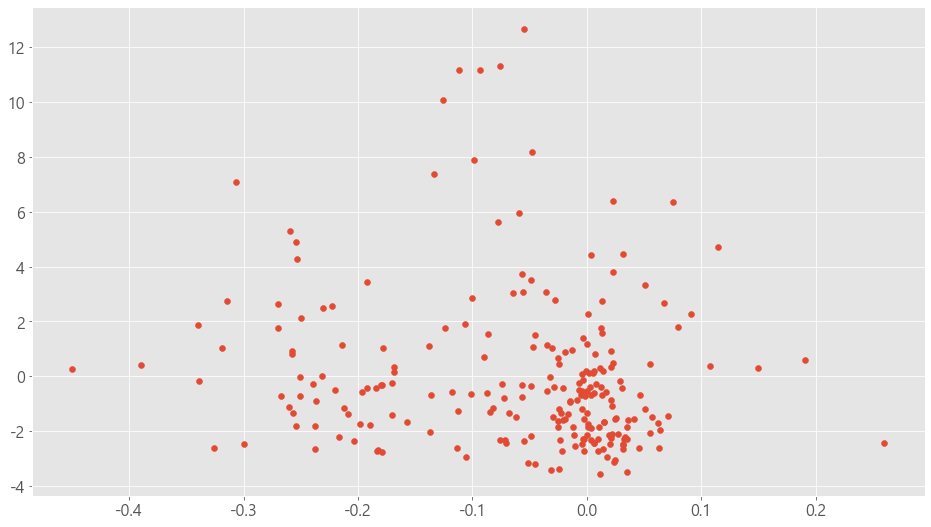

In [9]:
plt.scatter(df_temp['예산인구평가지표'],df_temp['복지서비스평가지표'])

## 2.1. 노인 인구 비 상/하위 차트
---
- 대상은 노인 인구비
- 전국을 다른 색상을 주어 차이를 확인한다.

In [5]:
pop_ratio_avg = df_score['노인인구비'].mean()
pop_ratio_top = df_score.sort_values(by='노인인구비',ascending=False).iloc[:15,:]
pop_ratio_bottom = df_score.sort_values(by='노인인구비').iloc[:15,:]
# pop_ratio_top
# pop_ratio_bottom

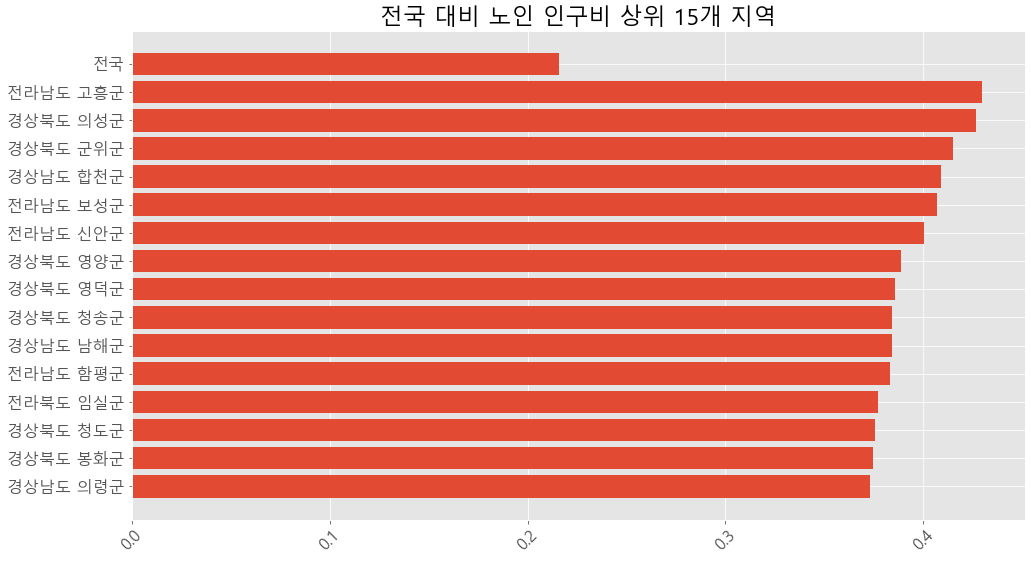

In [6]:
plt.title('전국 대비 노인 인구비 상위 15개 지역')
plt.barh(pop_ratio_top.sort_values(by='노인인구비')['지역명'].values.tolist()+['전국'],
        pop_ratio_top['노인인구비'].sort_values().values.tolist()+[pop_ratio_avg])
plt.xticks(rotation=45)
plt.show()

## 2.2. 예산 비율 도넛 차트

# 3.통계적차이
---

In [7]:
import geopandas as gpd
import folium

os.getcwd()

'c:\\Users\\yunjc\\python_jupyter\\Project_DA\\bigdatamap\\notebook'

In [8]:
sgg_shp = gpd.read_file('../../../../qgis/bigdatamap/Z_SOP_BND_SIGUNGU_PG/Z_SOP_BND_SIGUNGU_PG.shp', 
                        encoding='euc-kr')

In [9]:
sgg_shp.sort_values(by=['SIGUNGU_CD'])

,BASE_DATE,SIGUNGU_CD,SIGUNGU_NM,OBJECTID,geometry
195,20200630,11010,종로구,196,"POLYGON ((197800.769 459064.245, 197782.531 45..."
196,20200630,11020,중구,197,"POLYGON ((202043.969 452491.141, 202063.481 45..."
167,20200630,11030,용산구,168,"POLYGON ((197275.979 450595.299, 197275.977 45..."
116,20200630,11040,성동구,117,"POLYGON ((203535.395 452606.268, 203569.567 45..."
31,20200630,11050,광진구,32,"POLYGON ((208981.056 452544.566, 209031.738 45..."
...,...,...,...,...,...
239,20200630,38380,함양군,240,"POLYGON ((262942.625 251386.347, 262988.676 25..."
10,20200630,38390,거창군,11,"POLYGON ((279721.703 267959.396, 279709.755 26..."
241,20200630,38400,합천군,242,"POLYGON ((299267.853 259812.934, 299302.987 25..."
193,20200630,39010,제주시,194,"MULTIPOLYGON (((122486.880 -23074.870, 122485...."


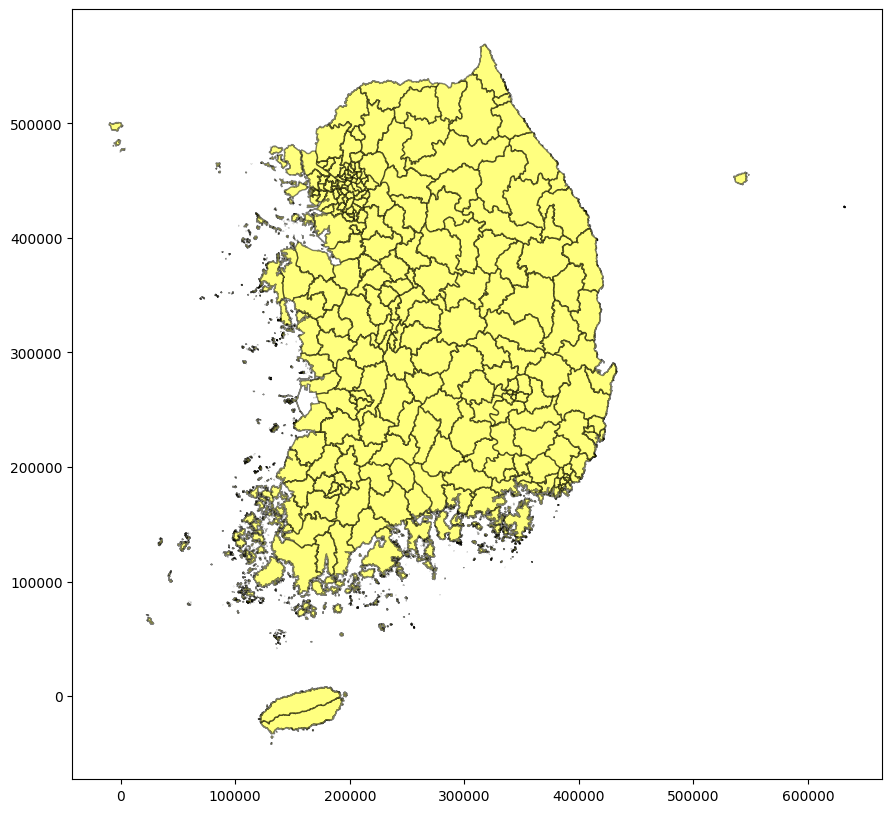

In [10]:
ax = sgg_shp.plot(figsize=(20,10),color='yellow',alpha=0.5,edgecolor='black')

In [11]:
sgg_shp.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   BASE_DATE   250 non-null    object  
 1   SIGUNGU_CD  250 non-null    object  
 2   SIGUNGU_NM  250 non-null    object  
 3   OBJECTID    250 non-null    object  
 4   geometry    250 non-null    geometry
dtypes: geometry(1), object(4)
memory usage: 9.9+ KB


# 4.지표 생성

In [12]:
df_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   시군구코드     229 non-null    int64  
 1   시도명       229 non-null    object 
 2   시군구명      229 non-null    object 
 3   지역명       229 non-null    object 
 4   노인인구비     229 non-null    float64
 5   노인1인할당예산  229 non-null    float64
 6   노인복지예산비   229 non-null    float64
dtypes: float64(3), int64(1), object(3)
memory usage: 12.6+ KB


C:\Users\yunjc\anaconda3\envs\main\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='노인인구비', ylabel='Density'>

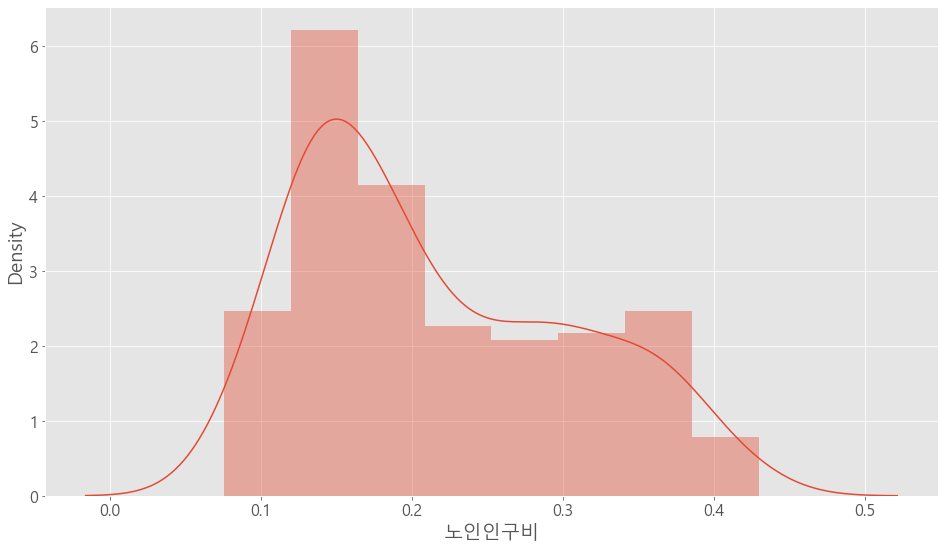

In [15]:
sns.distplot(df_score['노인인구비'])

C:\Users\yunjc\anaconda3\envs\main\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

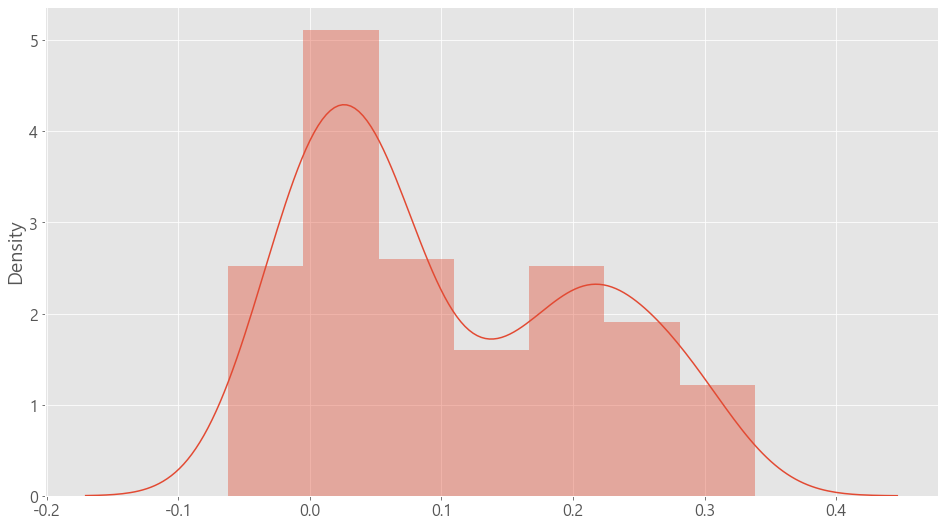

In [20]:
temp = df_score['노인인구비'] - df_score['노인복지예산비']
sns.distplot(temp)

## 4.1. 천천히 생각해보기
---
1. 복지 기대 수준 = 100 * (노인인구비)  *일단 넘어가*
2. 복지 시설 다양성 shanon winer index


In [22]:
df_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   시군구코드     229 non-null    int64  
 1   시도명       229 non-null    object 
 2   시군구명      229 non-null    object 
 3   지역명       229 non-null    object 
 4   노인인구비     229 non-null    float64
 5   노인1인할당예산  229 non-null    float64
 6   노인복지예산비   229 non-null    float64
dtypes: float64(3), int64(1), object(3)
memory usage: 12.6+ KB


In [ ]:
df_score['예산관련지표'] = df_score['노인복지예산비']/df_score['노인인구비']